In [2]:
import matplotlib.pyplot
%matplotlib inline

import numpy
import scipy.special

import httplib2
import os

In [56]:
def httpDownload(source,destinationPath,destinationFile):
    h = httplib2.Http('.cache')
    response, content = h.request(source)
    if os.path.exists(destinationPath)==False:
        os.mkdir(destinationPath)
    with open(destinationPath+destinationFile,'wb') as out:
        out.write(content)
        out.close()

In [90]:
#download csv mnist data from https://pjreddie.com/projects/mnist-in-csv/
mnistSource="https://pjreddie.com/media/files/"
filepath="mnist_dataset/"
filename="mnist_test.csv"
httpDownload(mnistSource+filename,filepath,filename)
filename="mnist_train.csv"
httpDownload(mnistSource+filename,filepath,filename)

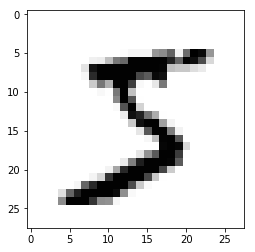

In [91]:
#read data
data_file=open(filepath+filename)
data_list=data_file.readlines()
data_file.close()
#plot one symbol
all_values=data_list[0].split(',')
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

In [3]:
class neuralNetwork:
    
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        
        #count of nodes: in, hidden, out layers
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
        #weight communication coefficient: weight_input_hidden & weight_hidden_output
        self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        #learning coefficient
        self.lr=learningrate
        
        #sigmoid activation function
        self.activation_function=lambda x: scipy.special.expit(x)
        
    def train(self, inputs_list, targets_list):
        
        #convert to 2-dim array
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T
        
        #input sighals ==> hidden layer
        hidden_inputs=numpy.dot(self.wih,inputs)
    
        #hidden layer ==> output signals 
        hidden_outputs=self.activation_function(hidden_inputs)
        
        #input signals ==> output layer
        final_inputs=numpy.dot(self.who,hidden_outputs)
        
        #output layer ==> output signals
        final_outputs=self.activation_function(final_inputs)
        
        output_errors=targets-final_outputs
        
        #input vs hidden layer errors
        hidden_errors=numpy.dot(self.who.T,output_errors)
        
        #hidden vs output weight coefficients update
        self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
        
        #input vs hidden weight coefficients update
        self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs))
    
    def query(self, inputs_list):
        
        #convert to 2-dim array
        inputs=numpy.array(inputs_list,ndmin=2).T
        
        #input signals ==> hidden layer
        hidden_inputs=numpy.dot(self.wih,inputs)
        
        #hidden layer ==> output signals 
        hidden_outputs=self.activation_function(hidden_inputs)
        
        #input signals ==> output layer
        final_inputs=numpy.dot(self.who,hidden_outputs)
        
        #output layer ==> output signals
        final_outputs=self.activation_function(final_inputs)

        return final_outputs

In [14]:
#nodes count
input_nodes=784 #28x28
hidden_nodes=500
output_nodes=10

learning_rate=0.2

n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [15]:
#read data
filepath="mnist_dataset/"
filename="mnist_train.csv"
training_data_file=open(filepath+filename)
training_data_list=training_data_file.readlines()
training_data_file.close()

In [16]:
#training
epochs=7
for e in range (epochs):
    for record in training_data_list:
        #read lines
        all_values=record.split(',')
        #scaling and bias
        inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
        #target output values
        targets=numpy.zeros(output_nodes)+0.01
        #all_values[0] - is target marker value for current record
        targets[int(all_values[0])]=0.99
        n.train(inputs,targets)
    print(e)

0
1
2
3
4
5
6


In [12]:
#testing
#read data
filepath="mnist_dataset/"
filename="mnist_test.csv"
test_data_file=open(filepath+filename)
test_data_list=test_data_file.readlines()
test_data_file.close()

#all_values=test_data_list[0].split(',')
#print(all_values[0])
#n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

In [13]:
scorecard=[]
for record in test_data_list:
    all_values=record.split(',')
    correct_label=int(all_values[0])
    #scaling and bias
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    #query
    outputs=n.query(inputs)
    label=numpy.argmax(outputs)
    #print(str(correct_label)+":"+str(label))
    if (label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        
scorecard_array=numpy.asarray(scorecard)
print("efficiency: ",scorecard_array.sum()/scorecard_array.size)

efficiency:  0.9664
